# Bonato Diego
## Assignment 1
#### Advanced Statistics For Physics Analysis

In [1]:
library(tidyverse)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Exercise 1

1. Read the data and import them in a data.frame or tibble structure

In [2]:
american = read_tsv("american_airline_empl.txt",show_col_types = FALSE)
delta    = read_tsv("delta_airline_empl.txt",show_col_types = FALSE)
federal  = read_tsv("federal_express_empl.txt",show_col_types = FALSE)
united   = read_tsv("united_airline_empl.txt",show_col_types = FALSE)    

In [3]:
#A quick look to the dataset
head(american)

Month Year Full-time Part-time Grand Total
1 1     1990 68137     9039      77176      
2 2     1990 68725     9273      77998      
3 3     1990 69509     9376      78885      
4 4     1990 69713     9326      79039      
5 5     1990 70376     9309      79685      
6 6     1990 71258     9369      80627

In [4]:
#Adding column with the name of the Company
american$Company = "American Airline"
delta$Company    = "Delta Airline"
federal$Company  = "Federal Express"
united$Company   = "United Airline"

2. Merge the four data tibble in a common tibble

In [5]:
merged_table = bind_rows(american,delta,federal,united)

In [6]:
#playing around with filters
merged_table %>% filter(Company == "Delta Airline" & Year == 1990)

Month Year Full-time Part-time Grand Total Company      
1   1    1990 56340     4226      60566       Delta Airline
2   2    1990 56413     4184      60597       Delta Airline
3   3    1990 56700     4117      60817       Delta Airline
4   4    1990 56630     4112      60742       Delta Airline
5   5    1990 56932     4156      61088       Delta Airline
6   6    1990 57478     4197      61675       Delta Airline
7   7    1990 58200     4377      62577       Delta Airline
8   8    1990 58220     4433      62653       Delta Airline
9   9    1990 57844     4433      62277       Delta Airline
10 10    1990 58190     4433      62623       Delta Airline
11 11    1990 57989     4450      62439       Delta Airline
12 12    1990 58413     4500      62913       Delta Airline

3. Produce a plot of the behaviour of the employees as a function of time for all four companies, separately for the number of full-time and part-time employees

In [7]:
#to avoid problems with special characters
names(merged_table)[3] = "Full_time"
names(merged_table)[4] = "Part_time"
names(merged_table)[5] = "Grand_total"

In [8]:
p1 = ggplot(merged_table, aes(x = Year, y = Full_time, color = Company)) +
  geom_line() + 
    labs(title = "Full-time contracts",
       x = "Year",
       y = "Number of employees") +
  theme_minimal()
 

In [9]:
p2 = ggplot(data = merged_table, mapping = aes(x=Year, y= Part_time,color=Company)) + 
    geom_line() + 
    labs(title = "Part-time contracts", x = "Year", y = "Number of Employees", guide=FALSE) +
    theme_minimal()

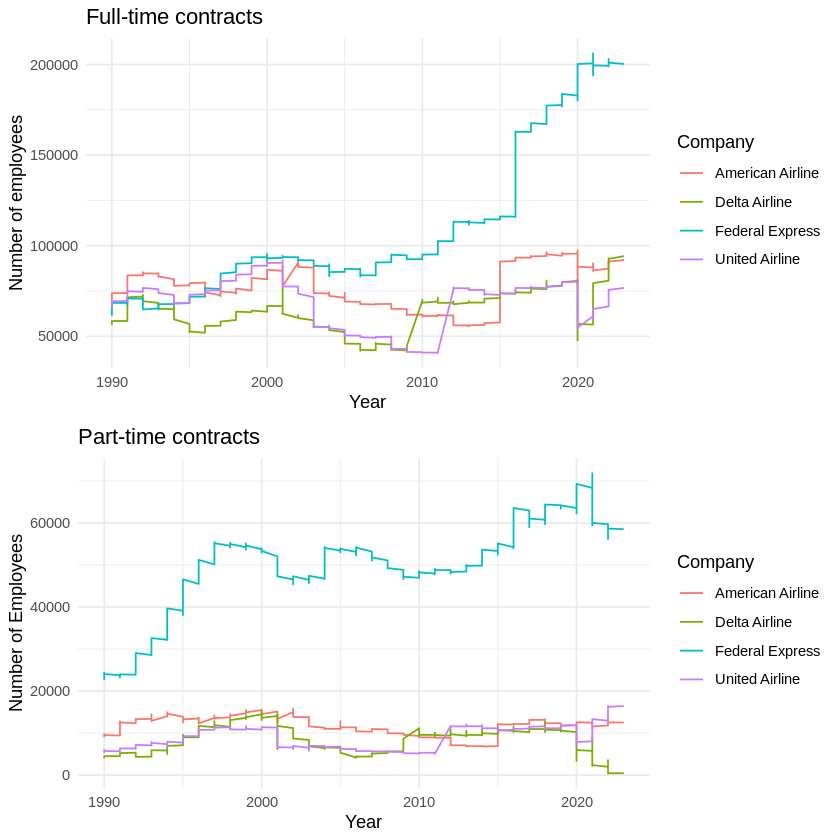

In [10]:
grid.arrange(p1,p2)

4. When did each Company reach the minimum and maximum number of employess ?

In [11]:
merged_table %>%
  group_by(Company) %>%
  summarize("Year min employees" = Year[which.min(Grand_total)],
            "Min employees" = min(Grand_total),
            "Year max exmployees" = Year[which.max(Grand_total)],
           "Max employees" = max(Grand_total)) %>%
  ungroup()

Company          Year min employees Min employees Year max exmployees
1 American Airline 2013               62290         2018               
2 Delta Airline    2006               46410         2023               
3 Federal Express  1990               84885         2021               
4 United Airline   2011               45781         2001               
  Max employees
1 109171       
2  94675       
3 270383       
4 102046

5. Plot the fraction of part-time worker over the total employees as a function of time

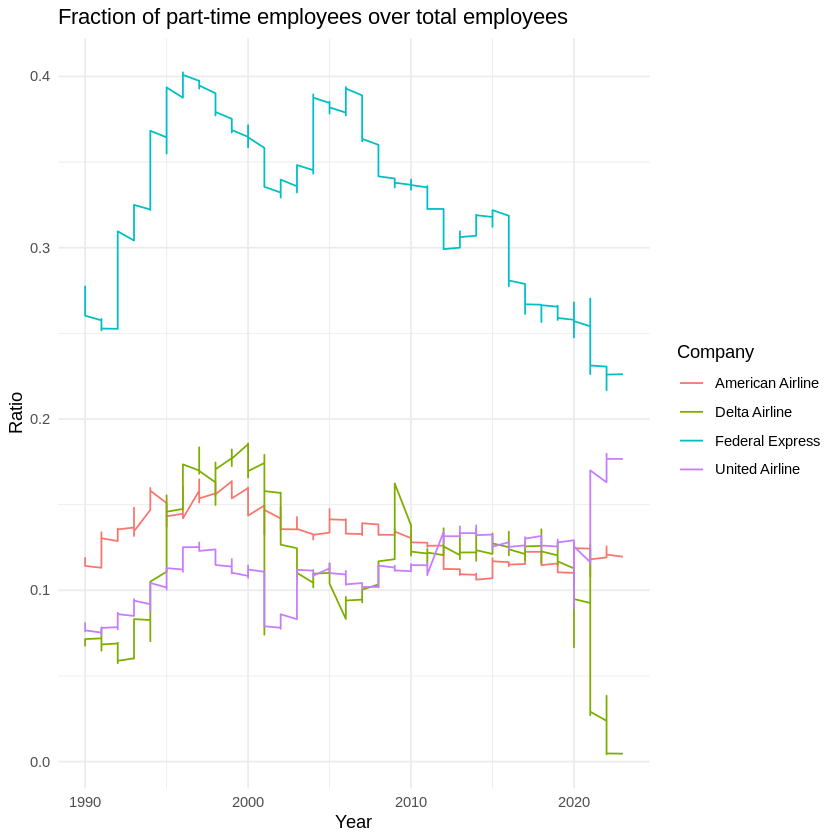

In [12]:
ggplot(merged_table,aes(x = Year, y = Part_time / Grand_total, color = Company)) +
  geom_line() +
  labs(title = "Fraction of part-time employees over total employees",
       x = "Year",
       y = "Ratio") +
  theme_minimal()


6. Did the COVID-19 pandemic have any influence in the employed workers of the airline companies? Can you see a trend in the years 2019-2023?

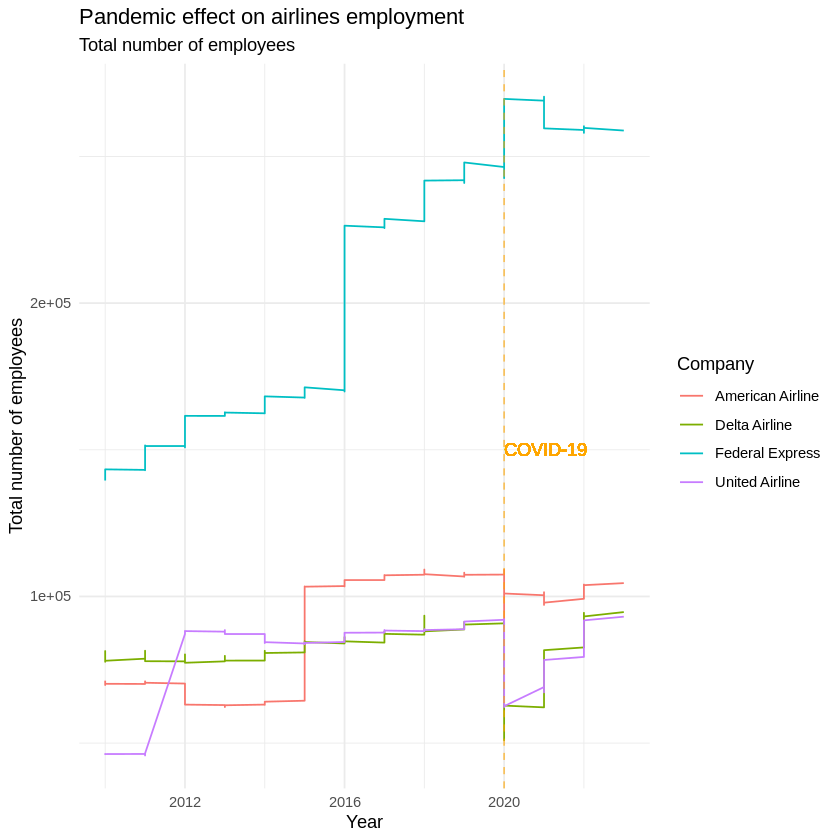

In [13]:
merged_table %>%
    filter(Year %in% 2010:2023) %>%
    ggplot(aes(x=Year,y=Grand_total,color = Company)) + 
    geom_line() + 
   
    labs(title="Pandemic effect on airlines employment",subtitle = "Total number of employees", x="Year",y="Total number of employees") + 
    theme_minimal() +
    geom_vline(xintercept = 2020, color = "orange",linetype="dashed",alpha=.6) +
    geom_text(aes(x = 2020, y = 150000, label = "COVID-19"), color = "orange", angle = 0, hjust = 0)



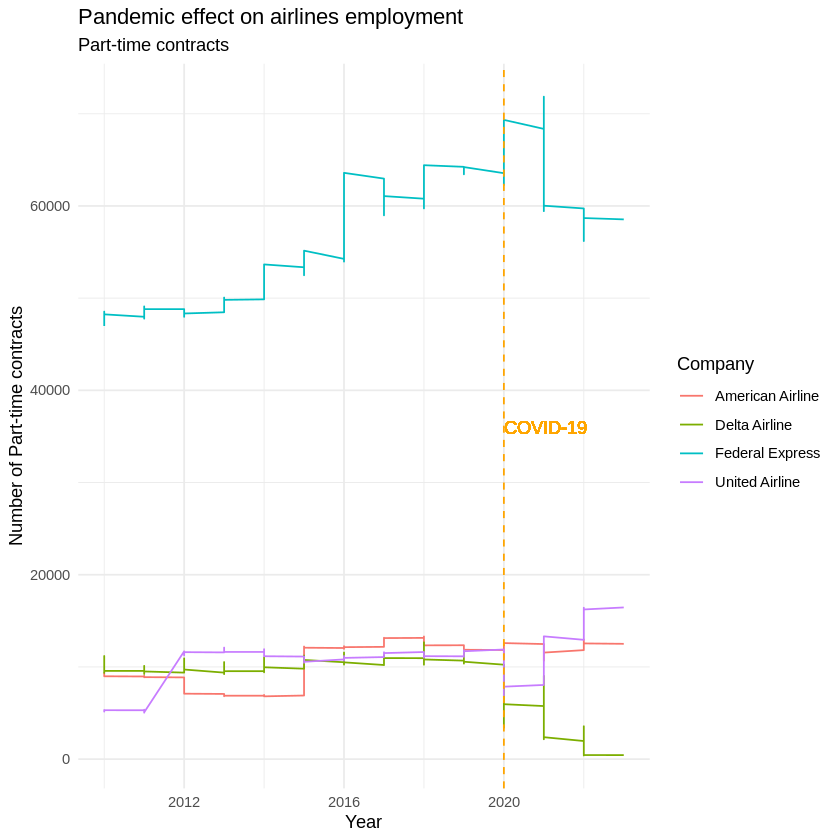

In [14]:
merged_table %>%
    filter(Year %in% 2010:2023) %>%
    ggplot(aes(x=Year,y=Part_time,color = Company)) + 
    geom_line() + 
   
    labs(title="Pandemic effect on airlines employment",subtitle = "Part-time contracts",x="Year",y="Number of Part-time contracts") + 
    theme_minimal() +
    geom_vline(xintercept = 2020, color = "orange",linetype="dashed") +
     geom_text(aes(x = 2020, y = max(Part_time)/2, label = "COVID-19"), color = "orange", angle = 0, hjust = 0)



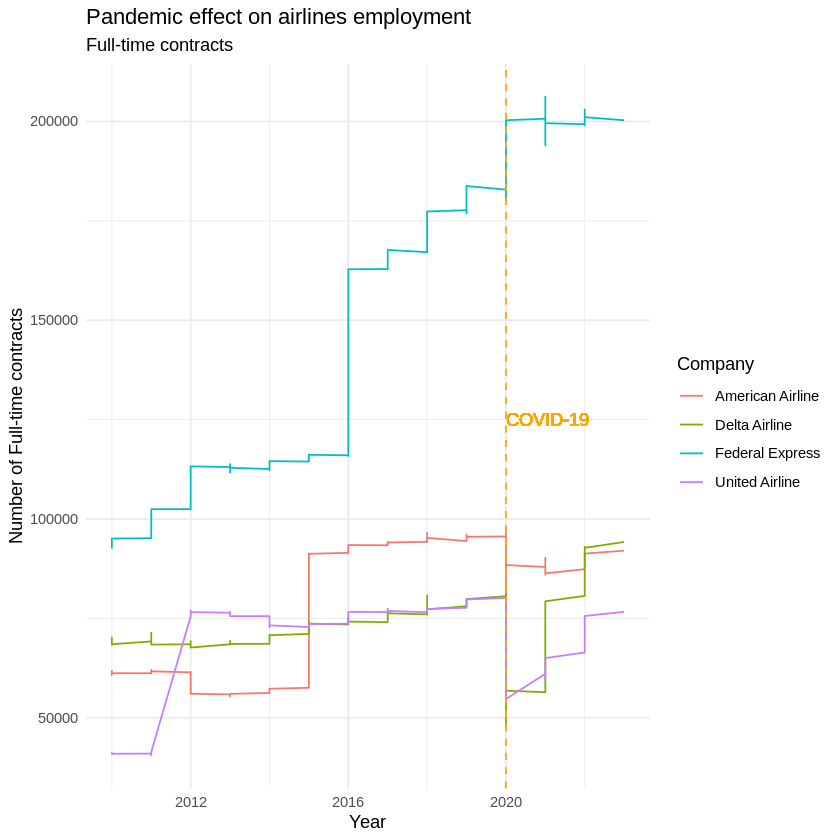

In [15]:
merged_table %>%
    filter(Year %in% 2010:2023) %>%
    ggplot(aes(x=Year,y=Full_time,color = Company)) + 
    geom_line() + 
    labs(title="Pandemic effect on airlines employment",subtitle = "Full-time contracts",x="Year",y="Number of Full-time contracts") + 
    theme_minimal() +
    geom_vline(xintercept = 2020, color = "orange",linetype="dashed") +
    geom_text(aes(x = 2020, y = 125000, label = "COVID-19"), color = "orange", angle = 0, hjust = 0)



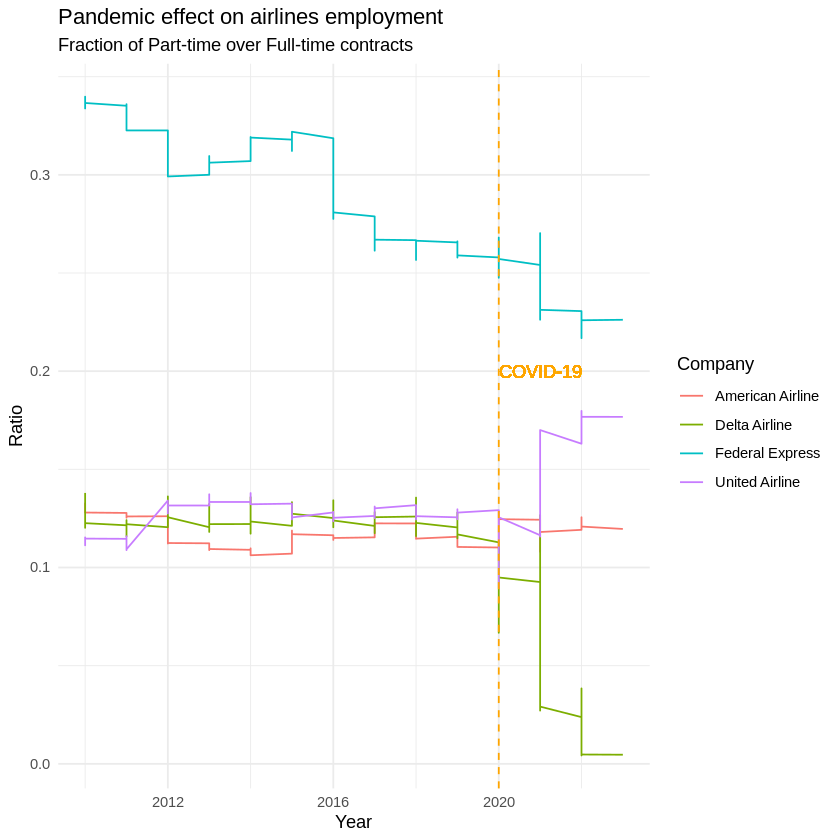

In [16]:
merged_table %>%
    filter(Year %in% 2010:2023) %>%
    ggplot(aes(x=Year,y=Part_time/Grand_total,color = Company)) + 
    geom_line() + 
   
    labs(title="Pandemic effect on airlines employment",subtitle = "Fraction of Part-time over Full-time contracts",
         x="Year",y="Ratio") + 
    theme_minimal() +
    geom_vline(xintercept = 2020, color = "orange",linetype="dashed") +
    geom_text(aes(x = 2020, y = .2, label = "COVID-19"), color = "orange", angle = 0, hjust = 0)



Understanding the effect of COVID-19 on airlines contracts is not so straightforward, especially if one takes into account the long-term trend. Each company reacted differently:

* **American Airline** workers seem to be unaffected by the pandemic.
* **Delta Airline** saw a strong decrease in the total number of workers, both full-time and part-time. However, the trend seems to be reverting in the last months as long as full-time contracts are considered (notice the steep decrease in the part-time vs. full-time plot that seems to be correlated with the pandemic).
* **Federal Express** has continued its long-time trend, apperaing unaffected by COVID-19.
* **United Airlines** seems to have terminated many full-time contracts, while keeping basically unchanged the number of part-time workers. This results in a higher part-time vs. full-time ratio.

## Exercise 2

In [17]:
library(nycflights13)

#### 1.1 Plot the total number of flights departed from each of the three NYC airports as a function of time (one entry for each of the 365 days.

From the documentation I know that the columns *faa* and *name* in the tables *airports* and *flights* are linked together. I use this fact to have a nicer visualisation in the plot.

In [18]:
#Renaming the faa column in order to join airports and flights
airports = airports %>% rename(origin = faa)

I will need the **"Date"** column all along the exercise so I am modifing the table.


In [19]:
flights = flights %>% mutate(date = as.Date(paste(year,month,day,sep="-")))

Now, let's **join** the tables.

In [20]:
flights = flights %>%
    left_join(airports %>% select(origin,name),by="origin")

We are ready to **plot**.

In [21]:
#I will need this variable for the next point
date_name_count = flights %>%
    group_by(date,name) %>%
    summarise(count=n()) 


`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


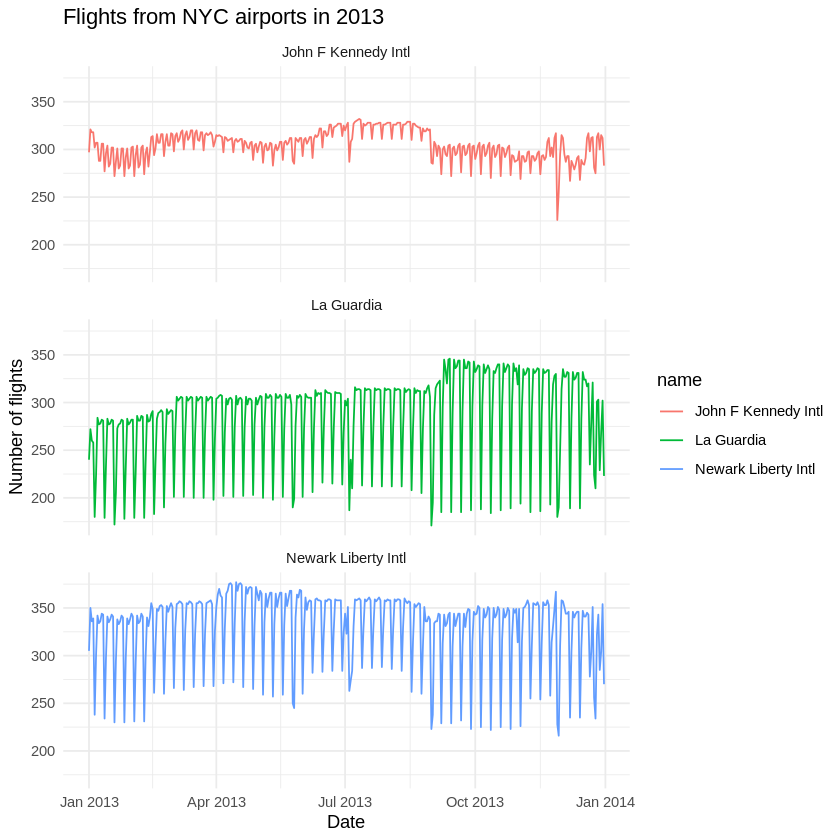

In [22]:
#plotting in three different axes because otherwise it's a mess
ggplot(date_name_count,aes(x=date,y=count,color=name)) + 
    geom_line() +
    labs(x="Date", y= "Number of flights", 
         fill="Departure airport", title="Flights from NYC airports in 2013") +
    theme_minimal() +
    facet_wrap(~ name, ncol = 1)

#### 1.2 Plot the average number of flights computed over the first five working days of each week as a function of the week number of the year. Produce the same plot for the flights departing over the weekend (Saturdays and Sundays).


`summarise()` has grouped output by 'week_number'. You can override using the
`.groups` argument.


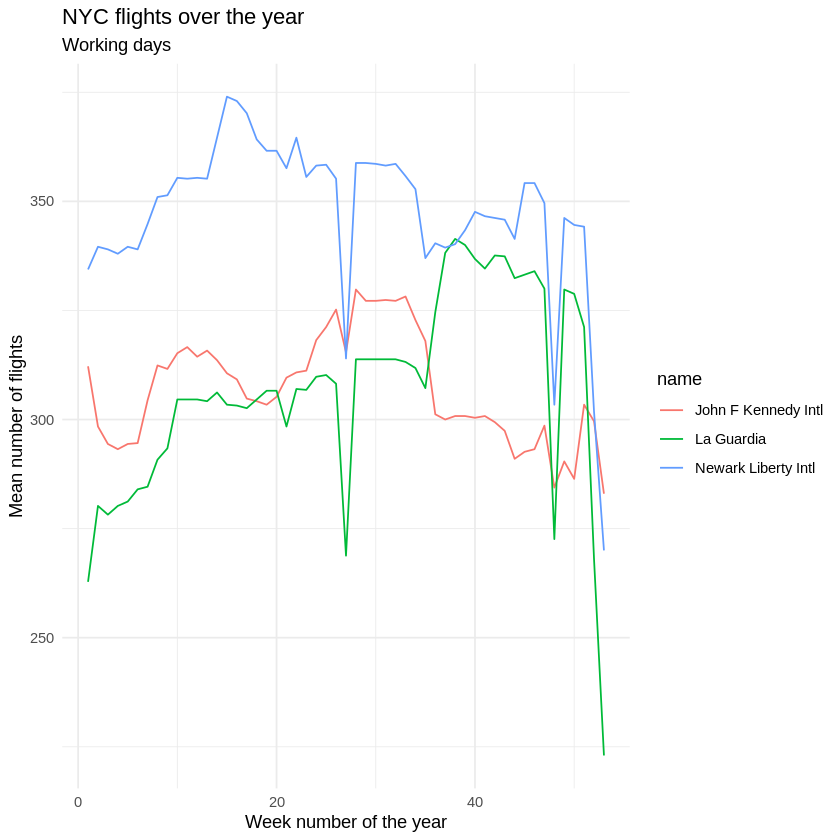

In [23]:
date_name_count %>%
    #wday takes a date as input and gives a number between 1 and 7 as an output
    #
    #By default the week starts on Sunday, 
    #so it is needed to specify week_start = 1 in order to set Monday as the beginning of the week
    #
    #filtering through working days only
    filter(wday(date,week_start = 1) %in% 1:5) %>%
    #
    #The function week() tells you the number of the week number of the year
    mutate(week_number = week(date)) %>%
    group_by(week_number,name) %>%
    summarise(mean_flights_per_week = mean(count)) %>%
    
    #plot it
    
    ggplot(aes(x=week_number,y=mean_flights_per_week,color=name))+
    geom_line() +
    labs(x="Week number of the year",y="Mean number of flights", fill="Departure airport",title = "NYC flights over the year",subtitle = "Working days")+
    theme_minimal()
    

From this plot it is possible to see **two local minima** corresponding to mid-august and to the end of december. This is probably due to the fact that near Summer break and Christmas holidays the habits of workers change. A similar pattern is shown in the following figure, plotting the mean number of flights during the weekends. 

`summarise()` has grouped output by 'week_number'. You can override using the
`.groups` argument.


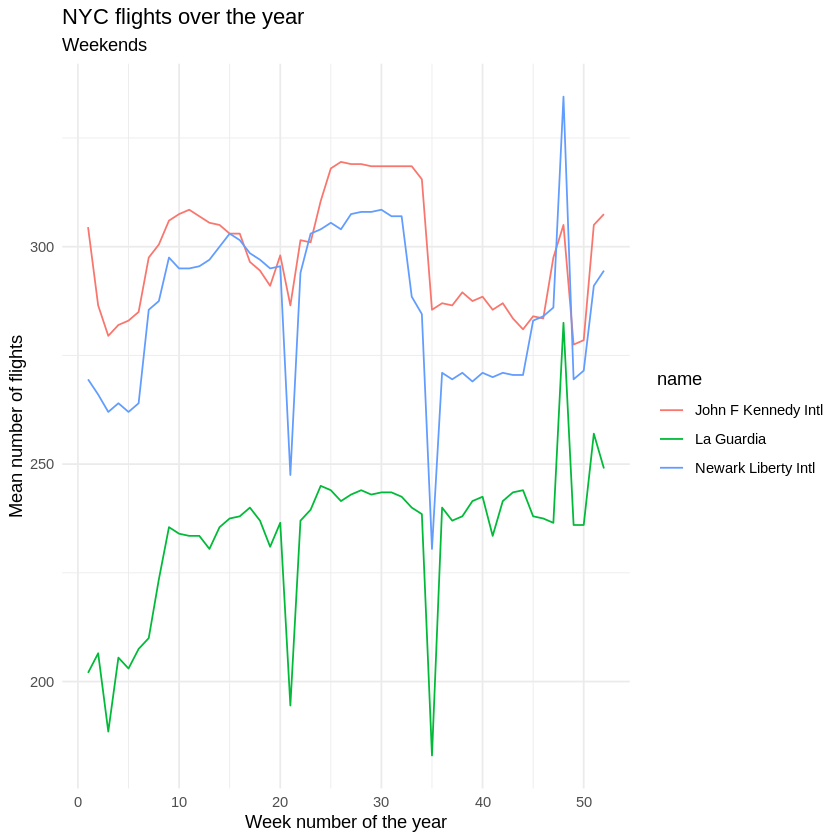

In [24]:
date_name_count %>%
    filter(wday(date,week_start = 1) %in% 6:7) %>%
    mutate(week_number = week(date)) %>%
    group_by(week_number,name) %>%
    summarise(mean_flights_per_week = mean(count)) %>%
    
    #plot it
    
    ggplot(aes(x=week_number,y=mean_flights_per_week,color=name))+
    geom_line() +
    labs(x="Week number of the year",y="Mean number of flights",title = "NYC flights over the year",subtitle = "Weekends")+
    theme_minimal()
    

With respect to the preceeding plot, here an additional feature can be seen. In fact, beside the two local minima already mentioned before, **a (global) maximum** is reached at the end of the year, corresponding to Christmas. That is, reguardless of the airport considered, **Christmas break is the period in which the most people leave NYC**.

#### 2. For each flight in the data frame, compute the departure delay and extract the following pieces of information (separately for each NYC airport):
- min, max and average delay for each day of the year (show the data in corresponding plots)


Departure delay time is already present in the *flights* table, so there is no need to compute it again.

In [25]:
delay_info_plot = flights %>%
    group_by(date,name) %>%
    #
    #na.rm=TRUE removes the NotAvailable values
    #
    summarise(min_dep_delay = min(dep_delay,na.rm=TRUE),
              max_dep_delay = max(dep_delay,na.rm=TRUE),
              avg_dep_delay = mean(dep_delay,na.rm=TRUE))

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


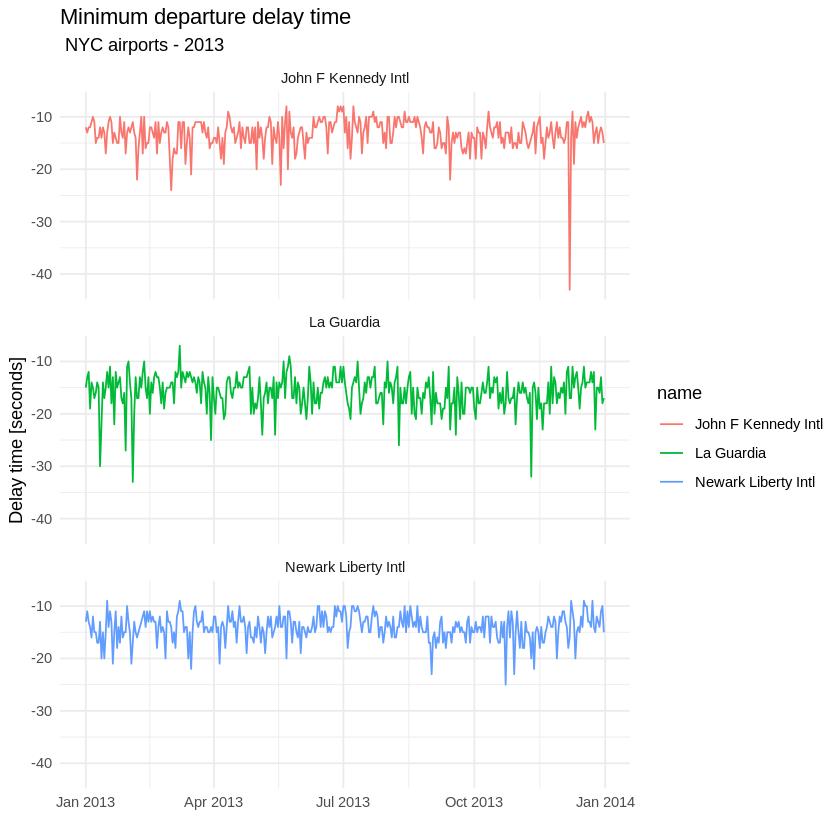

In [26]:
ggplot(delay_info_plot,aes(x=date,y=min_dep_delay,color=name))+
    geom_line() +
    theme_minimal() +
    facet_wrap(~ name, ncol = 1) +
    labs(x="",y="Delay time [seconds]",title="Minimum departure delay time",subtitle = " NYC airports - 2013")

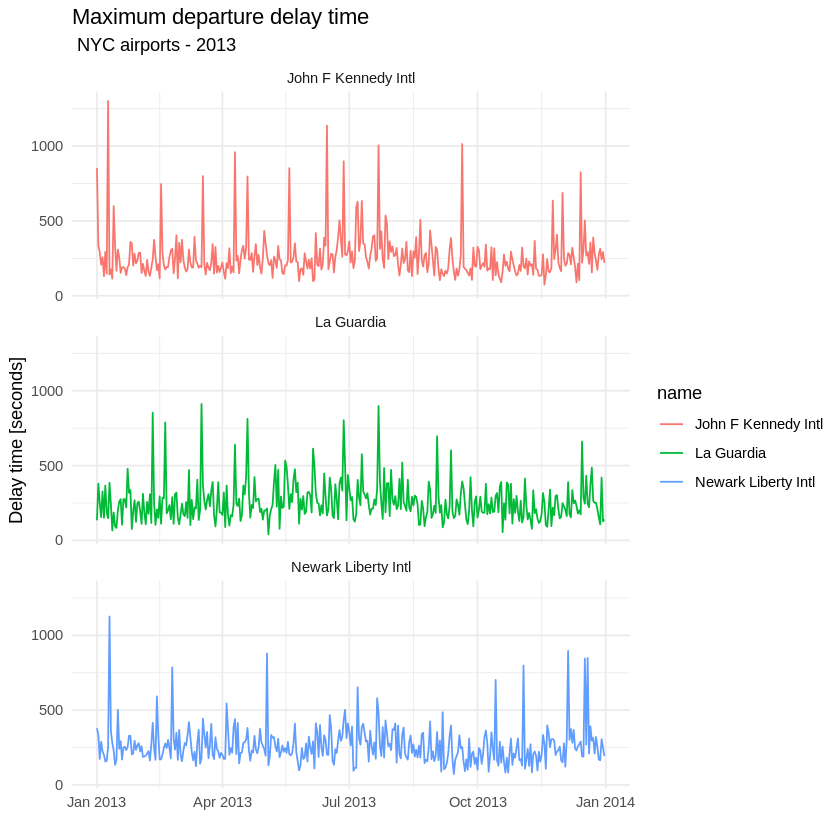

In [27]:
ggplot(delay_info_plot,aes(x=date,y=max_dep_delay,color=name))+
    geom_line() +
    theme_minimal() +
    facet_wrap(~ name, ncol = 1) +
    labs(x="",y="Delay time [seconds]",title="Maximum departure delay time",subtitle = " NYC airports - 2013")

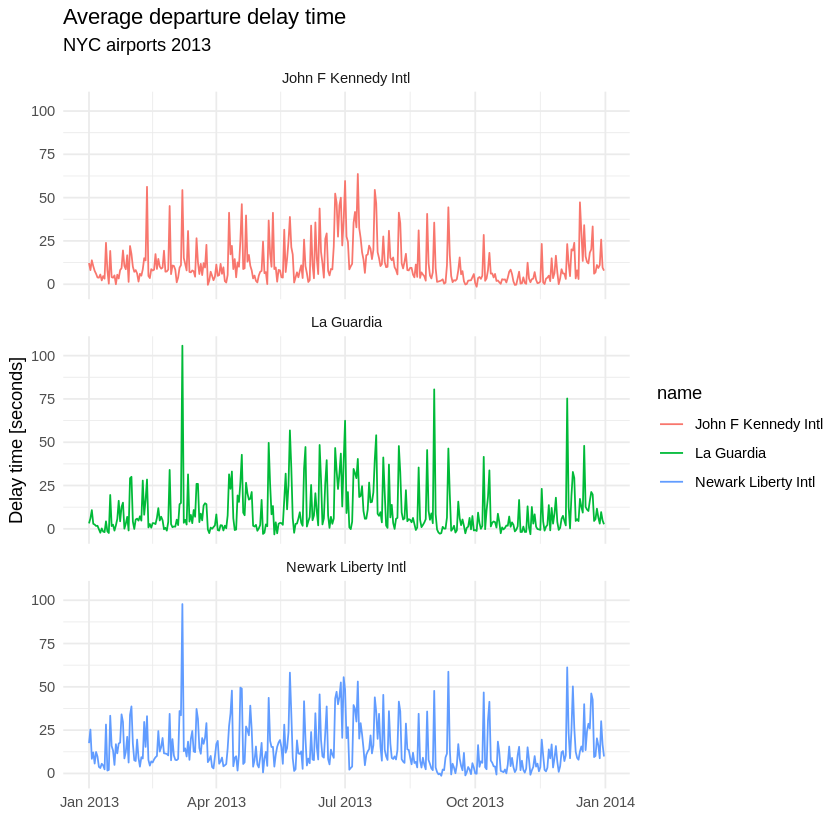

In [28]:
ggplot(delay_info_plot,aes(x=date,y=avg_dep_delay,color=name))+
    geom_line() +
    theme_minimal() +
    facet_wrap(~ name, ncol = 1) +
    labs(x="",y="Delay time [seconds]",title="Average departure delay time ",subtitle = "NYC airports 2013")

#### 3. Assuming the distance flew by the plane is, at first approximation, the distance between the two connecting airports (as given in the data frame), compute the average speed of each plane. Produce a plot of the average plane speed as a function of departure day of the year.


In [29]:
avg_speed = flights %>%
    #distance is in miles and air_time in minutes so I am multiplying by the corresponding factors
    mutate(AverageSpeed = (distance * 1.609344) / (air_time/60) ) %>% #kilometers / hour 
    select(date,tailnum,AverageSpeed) %>%
    arrange(date)

In [30]:
head(avg_speed)

date       tailnum AverageSpeed
1 2013-01-01 N14228  595.5282    
2 2013-01-01 N24211  602.3342    
3 2013-01-01 N619AA  657.2159    
4 2013-01-01 N804JB  831.5823    
5 2013-01-01 N668DN  634.3035    
6 2013-01-01 N39463  462.8473

In [31]:
avg_spees_per_day =  avg_speed %>%
                     na.omit() %>%
                     group_by(date) %>%
                     summarise(AvgSpeedPerDay = mean(AverageSpeed,na.rm=TRUE))

In [32]:
head(avg_spees_per_day)

date       AvgSpeedPerDay
1 2013-01-01 575.2001      
2 2013-01-02 587.6658      
3 2013-01-03 595.1091      
4 2013-01-04 616.9889      
5 2013-01-05 604.3898      
6 2013-01-06 593.5142

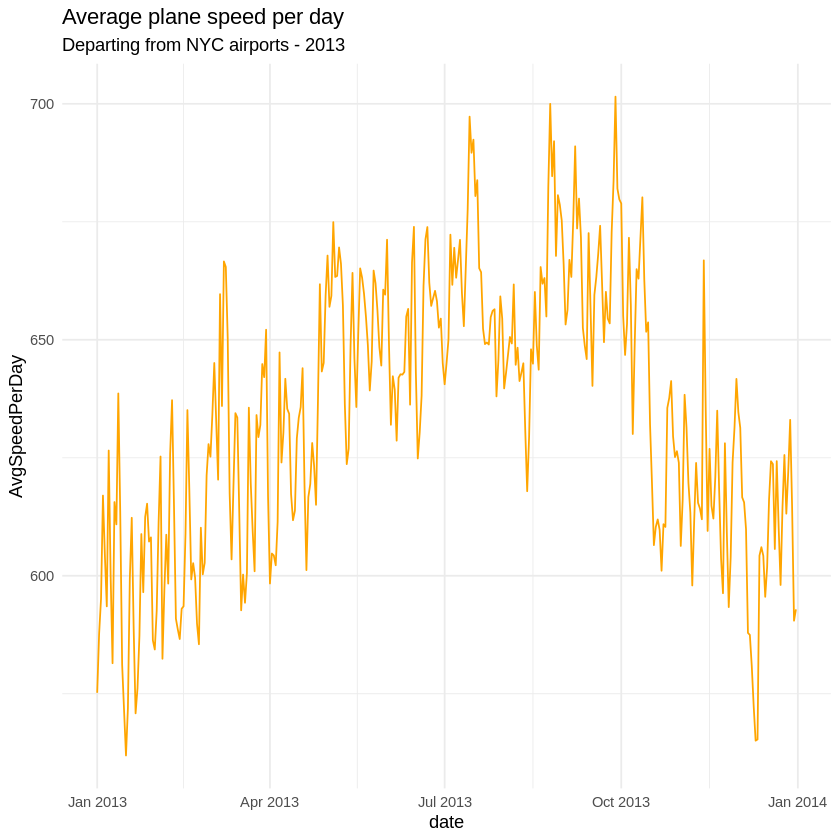

In [33]:
ggplot(data=avg_spees_per_day,aes(x=date,y=AvgSpeedPerDay)) +
    geom_line(color="orange") +
    theme_minimal() +
    labs(title = "Average plane speed per day", subtitle = "Departing from NYC airports - 2013")

#### 4. Analyze the flights offered by each airline company and determine:
- the airline companies offering the largest two numbers of flights per day and per week;
- the airline company offering the smallest number of flight per month;
- the airline company offering the longest distance flight per month.

(you can produce plots, if you like, to visualize the results of the analysis)

In [34]:
airlines

carrier name                       
1  9E      Endeavor Air Inc.          
2  AA      American Airlines Inc.     
3  AS      Alaska Airlines Inc.       
4  B6      JetBlue Airways            
5  DL      Delta Air Lines Inc.       
6  EV      ExpressJet Airlines Inc.   
7  F9      Frontier Airlines Inc.     
8  FL      AirTran Airways Corporation
9  HA      Hawaiian Airlines Inc.     
10 MQ      Envoy Air                  
11 OO      SkyWest Airlines Inc.      
12 UA      United Air Lines Inc.      
13 US      US Airways Inc.            
14 VX      Virgin America             
15 WN      Southwest Airlines Co.     
16 YV      Mesa Airlines Inc.

Since the column *carrier* is found both in the *airlines* and *flights* table, I am now **joining** the two.

In [35]:
#renaming to avoid conflicts with the already present "name" column in flights
airlines = airlines %>%rename(carrier_name = name)

In [36]:
flights = flights %>% left_join(airlines, by="carrier")

In [37]:
#largest two numbers of flights per day
flights %>%
    group_by(carrier_name,date) %>%
    summarise(count=n()) %>%
    group_by(date) %>%
    summarise(max1 = max(count), carrier1 = carrier_name[count == max1],
              max2 = max(count[count<max1]),carrier2 = carrier_name[count == max2])

`summarise()` has grouped output by 'carrier_name'. You can override using the
`.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


date       max1 carrier1              max2 carrier2                
1   2013-01-01 165  United Air Lines Inc. 163  JetBlue Airways         
2   2013-01-02 170  United Air Lines Inc. 162  JetBlue Airways         
3   2013-01-03 162  JetBlue Airways       159  United Air Lines Inc.   
4   2013-01-04 161  JetBlue Airways       138  ExpressJet Airlines Inc.
5   2013-01-04 161  United Air Lines Inc. 138  ExpressJet Airlines Inc.
6   2013-01-05 154  JetBlue Airways       117  United Air Lines Inc.   
7   2013-01-06 156  JetBlue Airways       137  United Air Lines Inc.   
8   2013-01-07 158  United Air Lines Inc. 149  ExpressJet Airlines Inc.
9   2013-01-07 158  United Air Lines Inc. 149  JetBlue Airways         
10  2013-01-08 156  United Air Lines Inc. 144  ExpressJet Airlines Inc.
11  2013-01-09 156  United Air Lines Inc. 147  ExpressJet Airlines Inc.
12  2013-01-10 158  United Air Lines Inc. 151  ExpressJet Airlines Inc.
13  2013-01-11 158  United Air Lines Inc. 150  JetBlue Airways         
14  2013-01-12 132  JetBlue Airways       112  United Air Lines Inc.   
15  2013-01-13 147  JetBlue Airways       137  United Air Lines Inc.   
16  2013-01-14 157  United Air Lines Inc. 150  ExpressJet Airlines Inc.
17  2013-01-15 155  United Air Lines Inc. 147  ExpressJet Airlines Inc.
18  2013-01-16 157  United Air Lines Inc. 148  ExpressJet Airlines Inc.
19  2013-01-17 157  United Air Lines Inc. 151  ExpressJet Airlines Inc.
20  2013-01-18 157  United Air Lines Inc. 147  ExpressJet Airlines Inc.
21  2013-01-19 128  JetBlue Airways       112  United Air Lines Inc.   
22  2013-01-20 144  JetBlue Airways       137  United Air Lines Inc.   
23  2013-01-21 157  United Air Lines Inc. 147  ExpressJet Airlines Inc.
24  2013-01-22 155  United Air Lines Inc. 145  ExpressJet Airlines Inc.
25  2013-01-23 157  United Air Lines Inc. 146  ExpressJet Airlines Inc.
26  2013-01-24 157  United Air Lines Inc. 150  ExpressJet Airlines Inc.
27  2013-01-25 157  United Air Lines Inc. 146  ExpressJet Airlines Inc.
28  2013-01-26 127  JetBlue Airways       112  United Air Lines Inc.   
29  2013-01-27 143  JetBlue Airways       137  United Air Lines Inc.   
30  2013-01-28 157  United Air Lines Inc. 148  ExpressJet Airlines Inc.
⋮   ⋮          ⋮    ⋮                     ⋮    ⋮                       
359 2013-12-02 178  United Air Lines Inc. 167  ExpressJet Airlines Inc.
360 2013-12-03 177  United Air Lines Inc. 159  ExpressJet Airlines Inc.
361 2013-12-04 173  United Air Lines Inc. 155  ExpressJet Airlines Inc.
362 2013-12-05 173  United Air Lines Inc. 156  ExpressJet Airlines Inc.
363 2013-12-06 172  United Air Lines Inc. 157  ExpressJet Airlines Inc.
364 2013-12-07 135  JetBlue Airways       116  United Air Lines Inc.   
365 2013-12-08 151  United Air Lines Inc. 145  JetBlue Airways         
366 2013-12-09 174  United Air Lines Inc. 157  ExpressJet Airlines Inc.
367 2013-12-10 169  United Air Lines Inc. 156  ExpressJet Airlines Inc.
368 2013-12-11 172  United Air Lines Inc. 155  ExpressJet Airlines Inc.
369 2013-12-12 173  United Air Lines Inc. 157  ExpressJet Airlines Inc.
370 2013-12-13 172  United Air Lines Inc. 157  ExpressJet Airlines Inc.
371 2013-12-14 136  JetBlue Airways       116  United Air Lines Inc.   
372 2013-12-15 155  United Air Lines Inc. 146  JetBlue Airways         
373 2013-12-16 175  United Air Lines Inc. 157  ExpressJet Airlines Inc.
374 2013-12-17 170  United Air Lines Inc. 156  ExpressJet Airlines Inc.
375 2013-12-18 169  United Air Lines Inc. 152  ExpressJet Airlines Inc.
376 2013-12-19 166  United Air Lines Inc. 162  ExpressJet Airlines Inc.
377 2013-12-20 164  JetBlue Airways       161  United Air Lines Inc.   
378 2013-12-21 160  JetBlue Airways       138  Delta Air Lines Inc.    
379 2013-12-22 165  JetBlue Airways       151  United Air Lines Inc.   
380 2013-12-23 178  United Air Lines Inc. 167  JetBlue Airways         
381 2013-12-24 161  JetBlue Airways       135  United Air Lines Inc.   
382 2013-12-25 159  JetBlue Airways       12

In [38]:
#largest two numbers of flights per week
flights %>%
    mutate(week_number = week(date)) %>%
    group_by(carrier_name,week_number) %>%
    summarise(count=n()) %>%
    group_by(week_number) %>%
    summarise(max1 = max(count), carrier1 = carrier_name[count == max1],
              max2 = max(count[count<max1]),carrier2 = carrier_name[count == max2])

`summarise()` has grouped output by 'carrier_name'. You can override using the
`.groups` argument.


week_number max1 carrier1                 max2 carrier2                
1   1          1107 JetBlue Airways          1067 United Air Lines Inc.   
2   2          1034 United Air Lines Inc.     993 JetBlue Airways         
3   3          1032 United Air Lines Inc.     968 JetBlue Airways         
4   4          1032 United Air Lines Inc.     959 JetBlue Airways         
5   5          1042 United Air Lines Inc.     965 JetBlue Airways         
6   6          1039 United Air Lines Inc.     971 JetBlue Airways         
7   7          1107 United Air Lines Inc.    1039 JetBlue Airways         
8   8          1127 United Air Lines Inc.    1076 JetBlue Airways         
9   9          1126 United Air Lines Inc.    1066 JetBlue Airways         
10 10          1128 United Air Lines Inc.    1080 ExpressJet Airlines Inc.
11 11          1128 United Air Lines Inc.    1085 JetBlue Airways         
12 12          1128 United Air Lines Inc.    1080 ExpressJet Airlines Inc.
13 13          1132 United Air Lines Inc.    1081 JetBlue Airways         
14 14          1179 United Air Lines Inc.    1077 JetBlue Airways         
15 15          1177 United Air Lines Inc.    1075 JetBlue Airways         
16 16          1175 United Air Lines Inc.    1066 ExpressJet Airlines Inc.
17 17          1176 United Air Lines Inc.    1066 ExpressJet Airlines Inc.
18 18          1134 United Air Lines Inc.    1091 ExpressJet Airlines Inc.
19 19          1123 United Air Lines Inc.    1097 ExpressJet Airlines Inc.
20 20          1121 United Air Lines Inc.    1096 ExpressJet Airlines Inc.
21 21          1072 United Air Lines Inc.    1047 JetBlue Airways         
22 22          1130 United Air Lines Inc.    1094 ExpressJet Airlines Inc.
23 23          1151 United Air Lines Inc.    1053 JetBlue Airways         
24 24          1188 United Air Lines Inc.    1059 JetBlue Airways         
25 25          1187 United Air Lines Inc.    1097 JetBlue Airways         
26 26          1169 United Air Lines Inc.    1125 JetBlue Airways         
27 27          1123 JetBlue Airways          1056 United Air Lines Inc.   
28 28          1164 United Air Lines Inc.    1125 JetBlue Airways         
29 29          1164 United Air Lines Inc.    1125 JetBlue Airways         
30 30          1164 United Air Lines Inc.    1125 JetBlue Airways         
31 31          1161 United Air Lines Inc.    1126 JetBlue Airways         
32 32          1164 United Air Lines Inc.    1125 JetBlue Airways         
33 33          1183 United Air Lines Inc.    1126 JetBlue Airways         
34 34          1183 United Air Lines Inc.    1110 JetBlue Airways         
35 35          1103 JetBlue Airways          1065 United Air Lines Inc.   
36 36          1103 United Air Lines Inc.    1089 ExpressJet Airlines Inc.
37 37          1137 ExpressJet Airlines Inc. 1086 United Air Lines Inc.   
38 38          1148 ExpressJet Airlines Inc. 1090 United Air Lines Inc.   
39 39          1133 United Air Lines Inc.    1111 ExpressJet Airlines Inc.
40 40          1148 United Air Lines Inc.    1119 ExpressJet Airlines Inc.
41 41          1141 United Air Lines Inc.    1097 ExpressJet Airlines Inc.
42 42          1140 United Air Lines Inc.    1097 ExpressJet Airlines Inc.
43 43          1135 United Air Lines Inc.    1100 ExpressJet Airlines Inc.
44 44          1125 United Air Lines Inc.    1069 ExpressJet Airlines Inc.
45 45          1176 United Air Lines Inc.    1085 ExpressJet Airlines Inc.
46 46          1172 United Air Lines Inc.    1088 ExpressJet Airlines Inc.
47 47          1159 United Air Lines Inc.    1062 ExpressJet Airlines Inc.
48 48          1071 United Air Lines Inc.    1047 JetBlue Airways         
49 49          1136 United Air Lines Inc.    1010 ExpressJet Airlines Inc.
50 50          1132 United Air Lines Inc.    1008 ExpressJet Airlines Inc.
51 51          1125 United Air Lines Inc.    1110 JetBlue Airways         
52 52          1147 JetBlue Airways          1042 United Air Lines Inc.   
53 53           161 JetBlue 

In [39]:
#the airline company offering the smallest number of flight per month

flights %>%
    mutate(month = month(date)) %>%
    mutate(month_name = factor(month.name[month], levels = month.name)) %>%
    group_by(carrier_name,month_name) %>%
    summarise(count=n()) %>%
    group_by(month_name) %>%
    summarise(min1 = min(count), carrier1 = carrier_name[count == min1],
              min2 = min(count[count>min1]),carrier2 = carrier_name[count == min2])

`summarise()` has grouped output by 'carrier_name'. You can override using the
`.groups` argument.


month_name min1 carrier1               min2 carrier2              
1  January     1   SkyWest Airlines Inc.  31   Hawaiian Airlines Inc.
2  February   28   Hawaiian Airlines Inc. 48   Mesa Airlines Inc.    
3  March      18   Mesa Airlines Inc.     31   Hawaiian Airlines Inc.
4  April      30   Hawaiian Airlines Inc. 38   Mesa Airlines Inc.    
5  May        31   Hawaiian Airlines Inc. 49   Mesa Airlines Inc.    
6  June        2   SkyWest Airlines Inc.  30   Hawaiian Airlines Inc.
7  July       31   Hawaiian Airlines Inc. 58   Frontier Airlines Inc.
8  August      4   SkyWest Airlines Inc.  31   Hawaiian Airlines Inc.
9  September  20   SkyWest Airlines Inc.  25   Hawaiian Airlines Inc.
10 October    21   Hawaiian Airlines Inc. 57   Frontier Airlines Inc.
11 November    5   SkyWest Airlines Inc.  25   Hawaiian Airlines Inc.
12 December   28   Hawaiian Airlines Inc. 50   Mesa Airlines Inc.

In [40]:
#the airline company offering the smallest number of flight per month

flights %>%
    mutate(month = month(date)) %>%
    mutate(month_name = factor(month.name[month], levels = month.name)) %>%
    group_by(carrier_name, month_name) %>%
    summarise(count=n()) %>%
    group_by(month_name) %>%
    summarise(min1 = min(count), 
              carrier1 = unique(carrier_name[count == min1]), 
              min2 = min(count[count > min1]), 
              carrier2 = unique(carrier_name[count == min2]))


`summarise()` has grouped output by 'carrier_name'. You can override using the
`.groups` argument.


month_name min1 carrier1               min2 carrier2              
1  January     1   SkyWest Airlines Inc.  31   Hawaiian Airlines Inc.
2  February   28   Hawaiian Airlines Inc. 48   Mesa Airlines Inc.    
3  March      18   Mesa Airlines Inc.     31   Hawaiian Airlines Inc.
4  April      30   Hawaiian Airlines Inc. 38   Mesa Airlines Inc.    
5  May        31   Hawaiian Airlines Inc. 49   Mesa Airlines Inc.    
6  June        2   SkyWest Airlines Inc.  30   Hawaiian Airlines Inc.
7  July       31   Hawaiian Airlines Inc. 58   Frontier Airlines Inc.
8  August      4   SkyWest Airlines Inc.  31   Hawaiian Airlines Inc.
9  September  20   SkyWest Airlines Inc.  25   Hawaiian Airlines Inc.
10 October    21   Hawaiian Airlines Inc. 57   Frontier Airlines Inc.
11 November    5   SkyWest Airlines Inc.  25   Hawaiian Airlines Inc.
12 December   28   Hawaiian Airlines Inc. 50   Mesa Airlines Inc.

In [41]:
#the airline company offering the longest distance flight per month.

flights %>%
    mutate(month = month(date)) %>%
    mutate(month_name = factor(month.name[month], levels = month.name)) %>%
    group_by(month_name) %>%
    summarise("Longest company" = carrier_name[max(distance)])
    

month_name Longest company         
1  January    Delta Air Lines Inc.    
2  February   Endeavor Air Inc.       
3  March      ExpressJet Airlines Inc.
4  April      Delta Air Lines Inc.    
5  May        Southwest Airlines Co.  
6  June       JetBlue Airways         
7  July       United Air Lines Inc.   
8  August     ExpressJet Airlines Inc.
9  September  American Airlines Inc.  
10 October    ExpressJet Airlines Inc.
11 November   United Air Lines Inc.   
12 December   Envoy Air